In [4]:
import pandas as pd
sms = pd.read_csv('spam.csv')
sms.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
sms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
sms.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# ham -> 0, spam -> 1
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [10]:
sms['Category'] = enc.fit_transform(sms['Category'])
sms.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
sms.duplicated().sum()

415

In [13]:
sms = sms.drop_duplicates(keep = 'first')

Exploratory Data Analysis




In [14]:
sms['Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32>

([<matplotlib.patches.Wedge at 0x2afff95ead0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

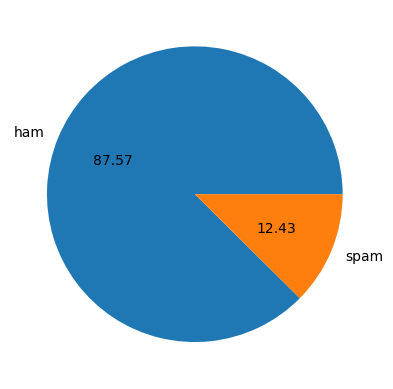

In [15]:
import matplotlib.pyplot as plt
plt.pie(sms['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [16]:
sms['num_char'] = sms['Message'].apply(len)
sms.head()

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Rani
[nltk_data]     Raut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
sms['num_words'] = sms['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
sms.head()

,Category,Message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
sms['num_sent'] = sms['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
sms.head()

,Category,Message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
sms[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
sms[sms['Category']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
sms[sms['Category']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

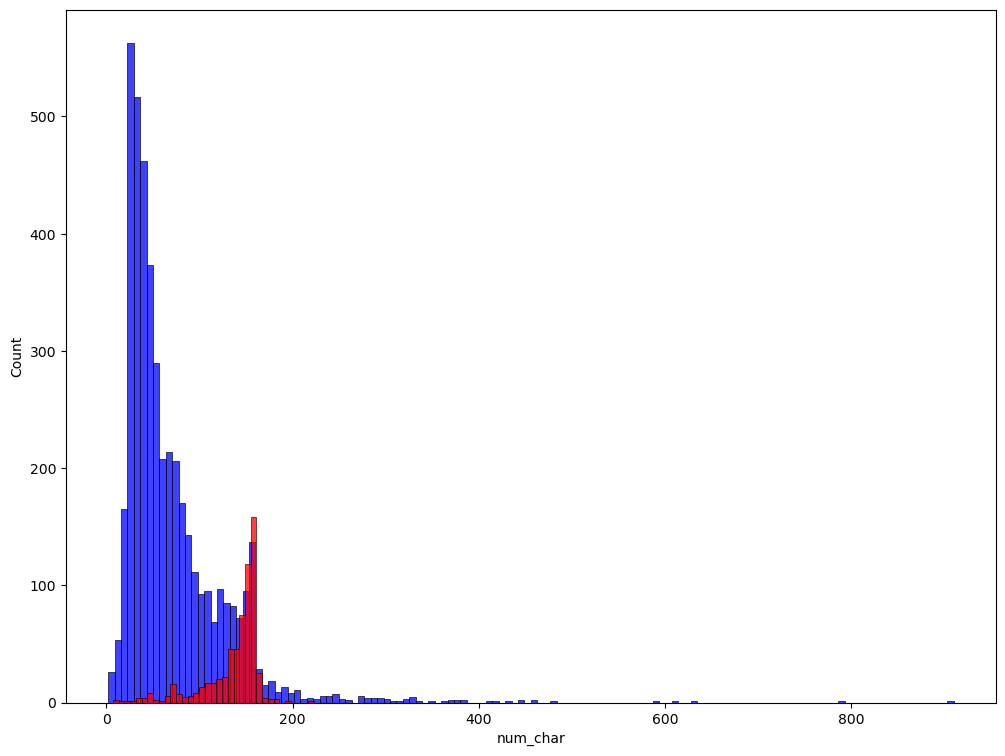

In [24]:
plt.figure(figsize =(12,9))
sns.histplot(sms[sms['Category']==0]['num_char'], color = 'blue')
sns.histplot(sms[sms['Category']==1]['num_char'], color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

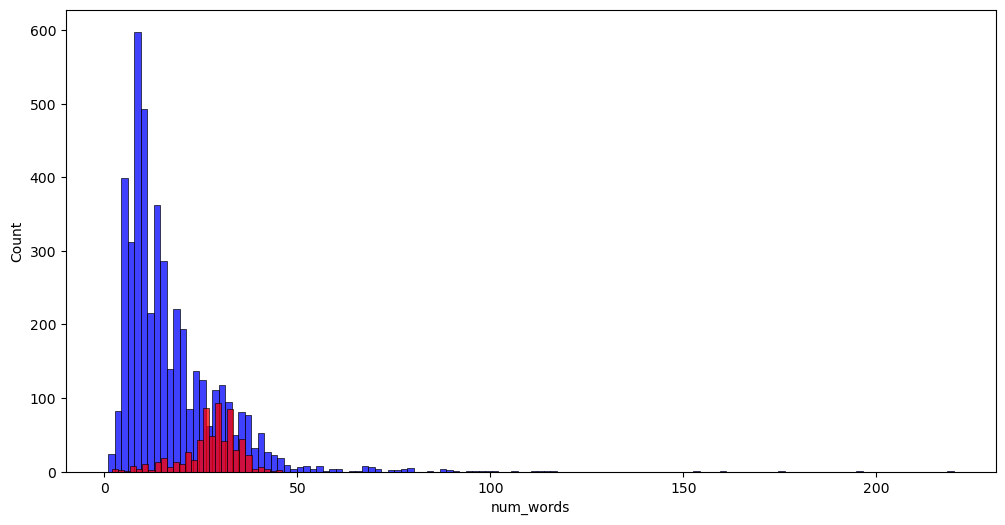

In [25]:
plt.figure(figsize =(12,6))
sns.histplot(sms[sms['Category']==0]['num_words'], color = 'blue')
sns.histplot(sms[sms['Category']==1]['num_words'], color = 'red')


<Axes: xlabel='num_sent', ylabel='Count'>

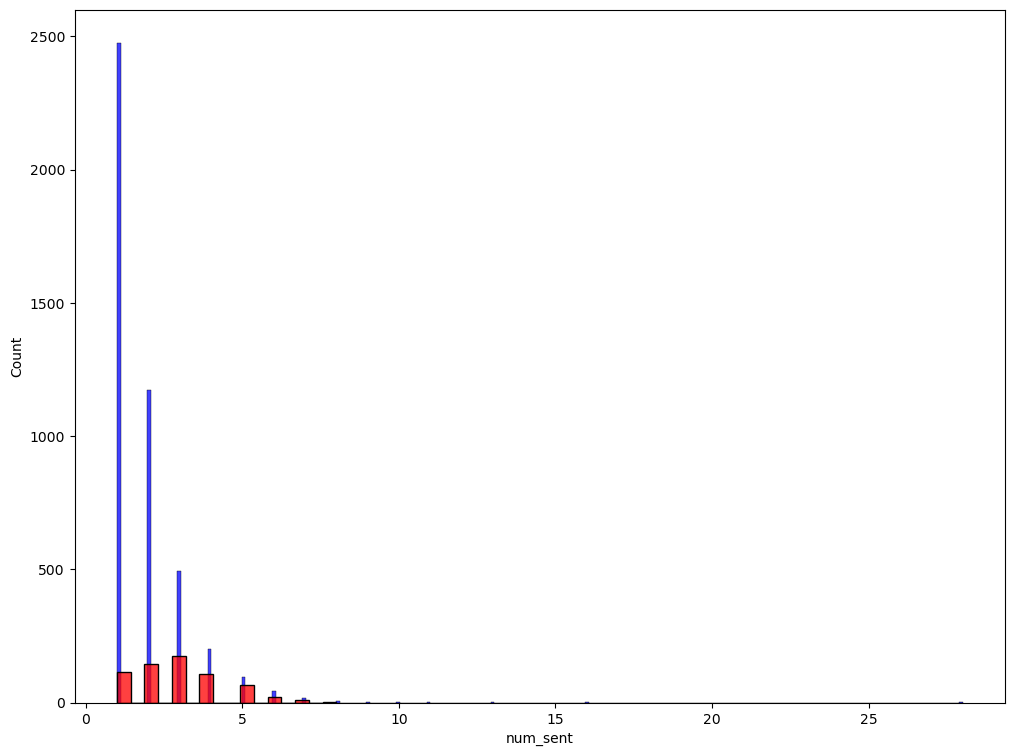

In [26]:
plt.figure(figsize =(12,9))
sns.histplot(sms[sms['Category']==0]['num_sent'], color = 'blue')
sns.histplot(sms[sms['Category']==1]['num_sent'], color = 'red')


In [27]:
sms.corr()

C:\Users\Rani Raut\AppData\Local\Temp\ipykernel_24876\3136446503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms.corr()


,Category,num_char,num_words,num_sent
Category,1.000000,0.374409,0.256038,0.281055
num_char,0.374409,1.000000,0.966164,0.636615
num_words,0.256038,0.966164,1.000000,0.683371
num_sent,0.281055,0.636615,0.683371,1.000000


Text Preprocessing



In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Rani
[nltk_data]     Raut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
ps.stem('dancing')

'danc'

In [49]:
def text_preprocessing(Message):
    Message =Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)
            
    Message = y.copy()
    y=[]
    for i in Message:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
        
    Message = y.copy()
    y=[]
    for i in Message:
            y.append(ps.stem(i))
        
    return ' '.join(y)

In [50]:
text_preprocessing('How Are %%% 23 Zam You?')


'23 zam'

In [51]:
text_preprocessing('I am enjoying Machine Learning')

'enjoy machin learn'

In [52]:
sms['transformed_Message'] = sms['Message'].apply(text_preprocessing)
sms.head()

,Category,Message,num_char,num_words,num_sent,transformed_message,transformed_text,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...,gojurongpointcraziavailbugingreatworldlaebuffe...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokewifuoni,oklarjokewifuoni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...,freeentri2wklicompwinfacupfinaltkt21stmaytextf...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsayearlihorucalreadisay,udunsayearlihorucalreadisay,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahthinkgoeusflivearoundthough,nahthinkgoeusflivearoundthough,nah think goe usf live around though


In [53]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width= 500, height= 500, min_font_size=10, background_color= 'black')




In [54]:
ham_wc = wc.generate(sms[sms['Category']==0]['transformed_Message'].str.cat(sep=''))

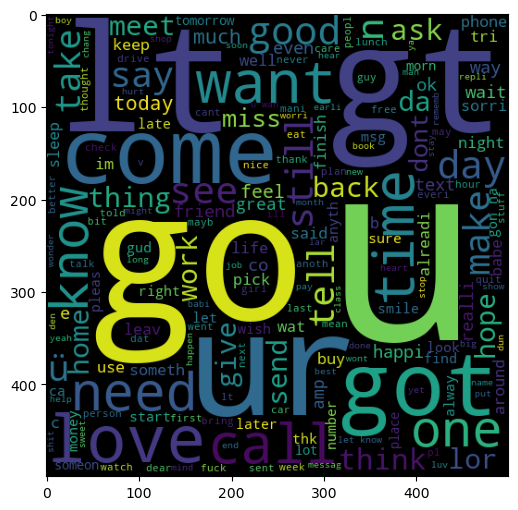

In [55]:
plt.figure(figsize= (12,6))
plt.imshow(ham_wc)


In [56]:
spam_wc = wc.generate (sms[sms['Category']==1]['transformed_Message'].str.cat(sep=''))

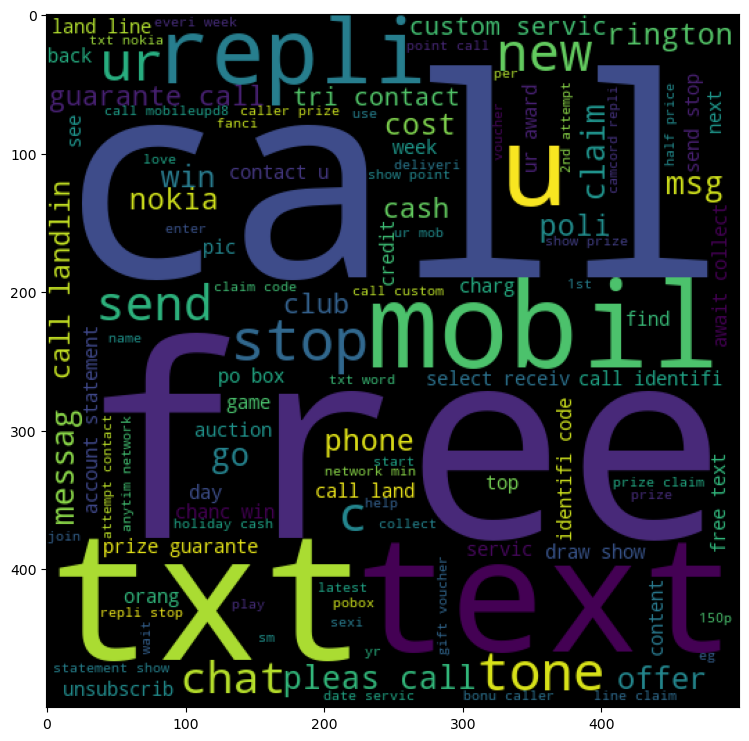

In [57]:
plt.figure(figsize= (12,9))
plt.imshow(spam_wc)


In [58]:
from collections import Counter
ls = sms[sms['Category']==1]['transformed_Message'].tolist()
words=[]
for i in ls:
    for word in i.split(' '):
        words.append(word)
c= Counter(words).most_common(30)
c.sort(key = lambda x: x[1], reverse = True)


In [59]:
c

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [144]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [145]:
tfidf = TfidfVectorizer(max_features=3000) #1
x = tfidf.fit_transform(sms['transformed_Message']).toarray()

In [146]:
from sklearn.preprocessing import MinMaxScaler #2
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [147]:
#appending the num_character col to X
import numpy as np
x= np.hstack((x,sms['num_char'].values.reshape(-1,1)))

In [148]:
y = sms['Category']

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =2)

In [150]:
 from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(x_train, y_train)
y_preds = gnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.875968992248062
0.49777777777777776


In [153]:
mnb.fit(x_train, y_train)
y_preds = mnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.9738372093023255
0.9807692307692307


In [154]:
bnb.fit(x_train, y_train)
y_preds = bnb.predict(x_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.9835271317829457
0.9824561403508771


In [155]:
#cv -> bnb,tfidf -> mnb
#Evaluation
!pip install xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

 

In [156]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc=  LogisticRegression(solver='liblinear', penalty='l1')
rfc=  RandomForestClassifier(n_estimators=50, random_state=2)
abc=  AdaBoostClassifier(n_estimators=50, random_state=2)
bc=   BaggingClassifier(n_estimators=50, random_state=2)
etc=  ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2) 
xgb=  XGBClassifier(n_estimators=50, random_state=2)

In [157]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' :
    abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
    
}

In [158]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    #clf = svc
    clf.fit(x_train, y_train)
    y_preds =clf.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_preds))
    precision_scores.append(precision_score(y_test, y_preds))
    print('for:',name)
    print(accuracy_score(y_test, y_preds))
    print(precision_score(y_test, y_preds))



R:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
R:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for: SVC
0.876937984496124
0.0
for: KN
0.9069767441860465
0.9428571428571428
for: NB
0.9738372093023255
0.9807692307692307
for: DT
0.9563953488372093
0.9361702127659575
for: LR
0.9680232558139535
0.9895833333333334
for: RF
0.9738372093023255
0.9901960784313726
for: AdaBoost
0.9660852713178295
0.896551724137931
for: BgC
0.9699612403100775
0.9444444444444444
for: ETC
0.9767441860465116
1.0
for: GBDT
0.9534883720930233
0.898989898989899
for: xgb
0.9738372093023255
0.9716981132075472


In [159]:
df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending = False)
df

,Algorithm,Accuracy,Precision
8,ETC,0.976744,1.000000
5,RF,0.973837,0.990196
4,LR,0.968023,0.989583
2,NB,0.973837,0.980769
10,xgb,0.973837,0.971698
7,BgC,0.969961,0.944444
1,KN,0.906977,0.942857
3,DT,0.956395,0.936170
9,GBDT,0.953488,0.898990
6,AdaBoost,0.966085,0.896552


In [165]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})
new_df = new_df.merge(temp_df,on='Algorithm')


C:\Users\Rani Raut\AppData\Local\Temp\ipykernel_24876\4273002338.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Precision_max_ft_3000_x', 'Accuracy_max_ft_3000_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df = new_df.merge(temp_df,on='Algorithm')


In [162]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,ETC,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
1,RF,0.973837,0.990196,0.973837,0.990196,0.973837,0.990196
2,LR,0.968023,0.989583,0.968023,0.989583,0.968023,0.989583
3,NB,0.973837,0.980769,0.973837,0.980769,0.973837,0.980769
4,xgb,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698
5,BgC,0.969961,0.944444,0.969961,0.944444,0.969961,0.944444
6,KN,0.906977,0.942857,0.906977,0.942857,0.906977,0.942857
7,DT,0.956395,0.936170,0.956395,0.936170,0.956395,0.936170
8,GBDT,0.953488,0.898990,0.953488,0.898990,0.953488,0.898990
9,AdaBoost,0.966085,0.896552,0.966085,0.896552,0.966085,0.896552


In [167]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})


In [168]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,ETC,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
1,RF,0.973837,0.990196,0.973837,0.990196,0.973837,0.990196,0.973837,0.990196
2,LR,0.968023,0.989583,0.968023,0.989583,0.968023,0.989583,0.968023,0.989583
3,NB,0.973837,0.980769,0.973837,0.980769,0.973837,0.980769,0.973837,0.980769
4,xgb,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698
5,BgC,0.969961,0.944444,0.969961,0.944444,0.969961,0.944444,0.969961,0.944444
6,KN,0.906977,0.942857,0.906977,0.942857,0.906977,0.942857,0.906977,0.942857
7,DT,0.956395,0.936170,0.956395,0.936170,0.956395,0.936170,0.956395,0.936170
8,GBDT,0.953488,0.898990,0.953488,0.898990,0.953488,0.898990,0.953488,0.898990
9,AdaBoost,0.966085,0.896552,0.966085,0.896552,0.966085,0.896552,0.966085,0.896552
